<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/Student_perf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student performance**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
df = pd.read_csv("student-mat.csv", sep=";")

# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
data_shape = df.shape
print(data_shape)
print(df.head())

# Ïà´ÏûêÌòï Î≥ÄÏàò
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric Columns ({}Í∞ú):".format(len(numeric_cols)))
print(", ".join(numeric_cols))

# Î≤îÏ£ºÌòï Î≥ÄÏàò
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(" Categorical Columns ({}Í∞ú):".format(len(categorical_cols)))
print(", ".join(categorical_cols))



# one-hot encoding (Ï≤´ Î≤àÏß∏ Î†àÎ≤® Ï†úÍ±∞: drop_first=True)
#df_encoded = pd.get_dummies(df, drop_first=True)

#data_shape, categorical_cols, df_encoded.shape


(395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Numeric Columns (16Í∞ú):
age, Medu, Fedu, traveltime, studytime, failures, fam

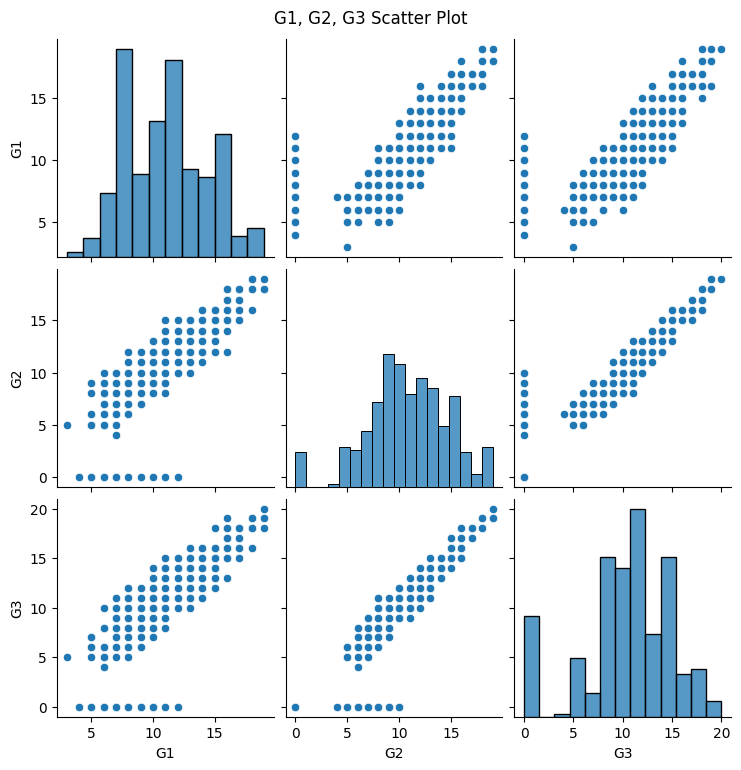

G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000

In [2]:
# G1, G2, G3Îßå Ï∂îÏ∂ú
grades = df[["G1", "G2", "G3"]]

# ÏÉÅÍ¥ÄÌñâÎ†¨ Í≥ÑÏÇ∞
correlation_matrix = grades.corr()

# Scatter plot
sns.pairplot(grades)
plt.suptitle("G1, G2, G3 Scatter Plot", y=1.02)
plt.show()

correlation_matrix


In [3]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# G2, G3 Ï†úÍ±∞ / G1ÏùÑ ÌÉÄÍ≤üÏúºÎ°ú ÏÑ§Ï†ï
df_g1 = df.drop(columns=["G2", "G3"])
target = "G1"

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
df_g1_encoded = pd.get_dummies(df_g1, drop_first=True)

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
train_df, test_df = train_test_split(df_g1_encoded, test_size=0.2, random_state=42)

# Stepwise selection Ìï®Ïàò Ïû¨Ï†ïÏùò
def stepwise_selection(data, target, direction='both'):
    remaining = list(data.columns)
    remaining.remove(target)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(target, ' + '.join(selected + [candidate]))
            model = smf.ols(formula, data=data).fit()
            aic = model.aic
            scores_with_candidates.append((aic, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break

    final_formula = "{} ~ {}".format(target, ' + '.join(selected))
    final_model = smf.ols(final_formula, data=data).fit()
    return final_model, final_formula

# Stepwise Î™®Îç∏ Ï†ÅÌï©
step_model_g1, step_formula_g1 = stepwise_selection(train_df, target)

# ÏµúÏ¢Ö Î™®Ìòï Ïãù Ï∂úÎ†•
step_formula_g1


'G1 ~ failures + schoolsup_yes + studytime + Fjob_teacher + famsup_yes + Mjob_health + Mjob_services + higher_yes + sex_M + goout + freetime + health + famsize_LE3'

In [4]:
#!pip install statsmodels

In [5]:
# ÏµúÏ¢Ö ÌöåÍ∑ÄÎ™®ÌòïÏùò Í≥ÑÏàò ÏöîÏïΩ (statsmodels summary Ï∂úÎ†•)
step_model_g1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     11.58
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.89e-20
Time:                        18:54:41   Log-Likelihood:                -753.21
No. Observations:                 316   AIC:                             1534.
Df Residuals:                     302   BIC:                             1587.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.6790      1.068      8.130      0.000       6.578      10.780
schoolsup_yes[T.True]    -2.2238      0.448     -4.961      0.000      -3.106      -1.342
Fjob_teacher[T.True]      2.0751      0.617      3.364      0.001       0.861       3.289
famsup_yes[T.True]       -1.0467      0.326     -3.213      0.001      -1.688      -0.406
Mjob_health[T.True]       1.9321      0.561      3.444      0.001       0.828       3.036
Mjob_services[T.True]     1.1807      0.352      3.352      0.001       0.488       1.874
higher_yes[T.True]        1.7956      0.703      2.553      0.011       0.412       3.180
sex_M[T.True]             0.7140      0.339      2.109      0.036       0.048       1.380
famsize_LE3[T.True]       0.4866      0.340      1.431      0.153      -0.182       1.156
failures                 -1.2915      0.221     -5.843      0.000      -1.727      -0.857
studytime                 0.8734      0.197      4.423      0.000       0.485       1.262
goout                    -0.4085      0.146     -2.789      0.006      -0.697      -0.120
freetime                  0.3086      0.163      1.892      0.059      -0.012       0.630
health                   -0.1814      0.110     -1.655      0.099      -0.397       0.034
==============================================================================
Omnibus:                        3.557   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                3.164
Skew:                           0.166   Prob(JB):                        0.206
Kurtosis:                       2.639   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Categorical Î≥ÄÏàòÏ§ëÏóê ÌäπÏ†ï Î†àÎ≤®Îßå ÏÑ†ÌÉùÏù¥ ÎêòÍ≥† ÎÇòÎ®∏ÏßÄÎäî ÏÑ†ÌÉùÏù¥ ÎêòÏßÄ ÏïäÏïòÏùÑÎïå Ïñ¥ÎñªÍ≤å Ìï¥ÏÑùÌïòÎäîÍ∞Ä?

Ïñ¥Îñ§ Í¥ÄÏ∏°ÏπòÏùò Í∑∏ Î≥ÄÏàòÏùò Î†àÎ≤®Ïù¥ Î™®ÌòïÏóêÏÑú ÏÑ†ÌÉùÎêòÏßÄ ÏïäÏïòÏúºÎ©¥ Í∑∏ Î≥ÄÏàòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÍ∞Ä 0Ïù¥ÎùºÍ≥† Ìï¥ÏÑùÌïúÎã§.

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
y_train_true = train_df["G1"]
y_train_pred = step_model_g1.predict(train_df)

# RMSE Í≥ÑÏÇ∞
rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
rmse_train


np.float64(2.6238056088694024)

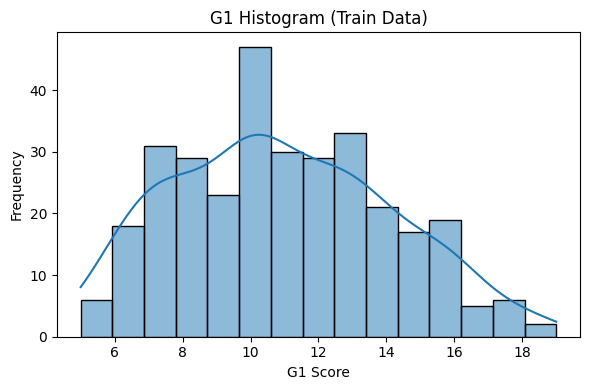

min     5.0
25%     8.0
50%    11.0
75%    13.0
max    19.0
Name: G1, dtype: float64

In [7]:
import matplotlib.pyplot as plt

# G1 ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(6, 4))
sns.histplot(train_df["G1"], bins=15, kde=True)
plt.title("G1 Histogram (Train Data)")
plt.xlabel("G1 Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 5-number summary
g1_summary = train_df["G1"].describe()[["min", "25%", "50%", "75%", "max"]]
g1_summary


In [8]:
## RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# X, y Ï†ïÏùò
X_train = train_df.drop(columns=["G1"])
y_train = train_df["G1"]

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ + Í∑∏Î¶¨Îìú ÏÑúÏπò (CV)
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å Î™®Ìòï Î∞è ÌååÎùºÎØ∏ÌÑ∞
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_score = -grid_search.best_score_

best_params, best_cv_score


({'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100},
 np.float64(8.709301592917274))

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î•º ÏßÅÏ†ë ÏûÖÎ†•ÌïòÍ±∞ÎÇò GridSearch Í≤∞Í≥ºÎ°úÎ∂ÄÌÑ∞ ÏÑ§Ï†ï

best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 5
}


# Î™®Îç∏ Ï†ÅÌï©
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# ÏòàÏ∏°
y_train_pred = best_rf_model.predict(X_train)

# ÏÑ±Îä• ÌèâÍ∞Ä
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"üîç Train R-squared: {train_r2:.4f}")
print(f"üîç Train RMSE: {train_rmse:.4f}")

üîç Train R-squared: 0.7943
üîç Train RMSE: 1.4566


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ÌäπÏÑ±, ÌÉÄÍ≤ü
X_train = train_df.drop(columns=["G1"])
y_train = train_df["G1"]

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}

# Gradient Boosting Î™®Îç∏ + GridSearchCV
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å Î™®Îç∏ Î∞è CV ÏÑ±Îä•
best_gbr_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_rmse = (-grid_search.best_score_) ** 0.5

print("üìå Best Parameters:", best_params)
print(f"üìâ Best CV RMSE: {best_cv_rmse:.4f}")

# Train setÏóêÏÑú Ïû¨Ï†ÅÌï© ÌõÑ ÌèâÍ∞Ä
y_train_pred = best_gbr_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(f"\n‚úÖ Train R-squared: {train_r2:.4f}")
print(f"‚úÖ Train RMSE: {train_rmse:.4f}")


üìå Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
üìâ Best CV RMSE: 3.0304

‚úÖ Train R-squared: 0.6135
‚úÖ Train RMSE: 1.9967


In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ÌäπÏÑ±, ÌÉÄÍ≤ü
X_train = train_df.drop(columns=["G1"])
y_train = train_df["G1"]

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# XGBoost Î™®Îç∏ + GridSearchCV
xgb = XGBRegressor(random_state=42, verbosity=0)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å Î™®Îç∏ Î∞è ÏÑ±Îä•
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_rmse = (-grid_search.best_score_) ** 0.5

print("üìå Best Parameters:", best_params)
print(f"üìâ Best CV RMSE: {best_cv_rmse:.4f}")

# TrainÏóêÏÑú Ïû¨Ï†ÅÌï© ÌõÑ ÌèâÍ∞Ä
y_train_pred = best_xgb_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(f"\n‚úÖ Train R-squared: {train_r2:.4f}")
print(f"‚úÖ Train RMSE: {train_rmse:.4f}")


üìå Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
üìâ Best CV RMSE: 2.9897

‚úÖ Train R-squared: 0.5998
‚úÖ Train RMSE: 2.0318


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X_test = test_df.drop(columns=["G1"])
y_test = test_df["G1"]

# 2. Í∞Å Î™®Îç∏ ÏòàÏ∏°Í∞í
y_pred_lin = step_model_g1.predict(test_df)                          # statsmodelsÎäî DataFrame ÏÇ¨Ïö©
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gbr = best_gbr_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)

# 3. ÏÑ±Îä• Í≥ÑÏÇ∞ Ìï®Ïàò
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 4. ÌèâÍ∞Ä Í≤∞Í≥º Ï†ÄÏû•
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "RMSE": [],
    "R-squared": []
}

for y_pred in [y_pred_lin, y_pred_rf, y_pred_gbr, y_pred_xgb]:
    rmse, r2 = evaluate_model(y_test, y_pred)
    results["RMSE"].append(rmse)
    results["R-squared"].append(r2)

# 5. Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE", ascending=True, inplace=True)

print("üìä Test Set Performance (Best Model = RMSE ÏµúÏÜå):")
print(results_df.to_string(index=False))


üìä Test Set Performance (Best Model = RMSE ÏµúÏÜå):
            Model     RMSE  R-squared
          XGBoost 3.205022   0.248716
    Random Forest 3.284797   0.210850
Linear Regression 3.292411   0.207188
Gradient Boosting 3.335086   0.186502


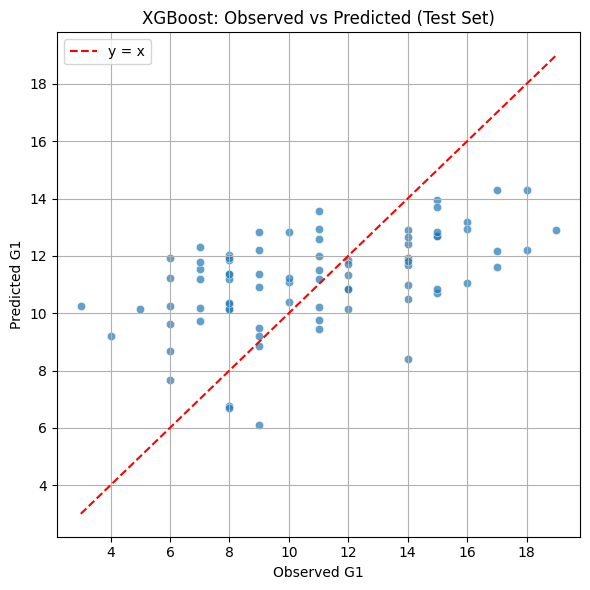

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í
y_true = y_test
y_pred = y_pred_xgb

# ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='y = x')
plt.xlabel("Observed G1")
plt.ylabel("Predicted G1")
plt.title("XGBoost: Observed vs Predicted (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

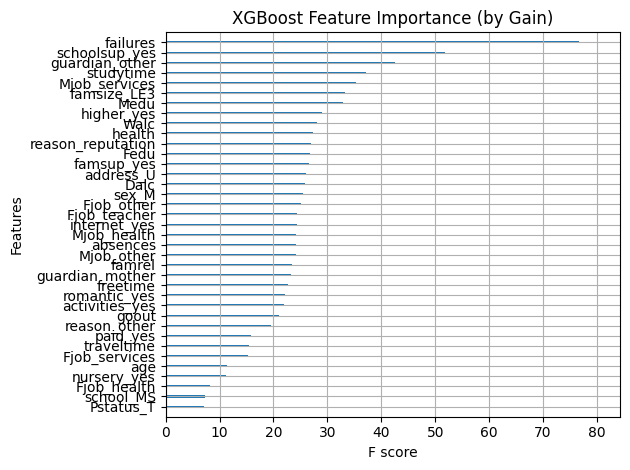

In [14]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
plt.figure(figsize=(8, 6))
xgb.plot_importance(best_xgb_model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance (by Gain)")
plt.tight_layout()
plt.show()


Top 2 Important Features: ['failures', 'schoolsup_yes']


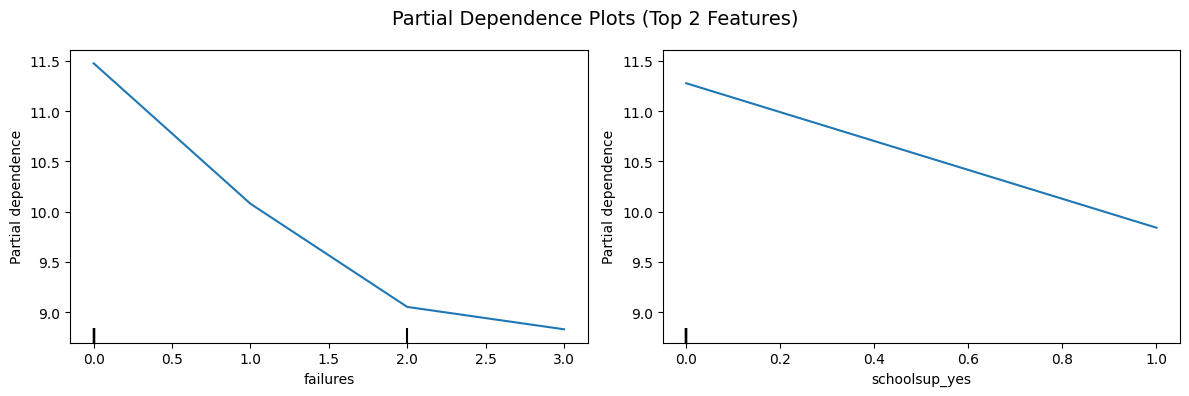

In [15]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 1. Î≥ÄÏàò Ï§ëÏöîÎèÑ Í∏∞Ï§Ä ÏÉÅÏúÑ 2Í∞ú feature Ï∂îÏ∂ú
import numpy as np

feature_importances = best_xgb_model.feature_importances_
top2_indices = np.argsort(feature_importances)[-2:][::-1]
top2_features = X_test.columns[top2_indices].tolist()

print("Top 2 Important Features:", top2_features)

# 2. PDP ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
PartialDependenceDisplay.from_estimator(best_xgb_model, X_test, features=top2_features, ax=ax)
plt.suptitle("Partial Dependence Plots (Top 2 Features)", fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
#failure Î≥ÄÏàòÎäî ÎÇôÏ†úÍ≥ºÎ™© Ïàò
#schoolsup yes=Î≥¥Ï∂©ÏàòÏóÖ

<Axes: xlabel='failures', ylabel='G1'>

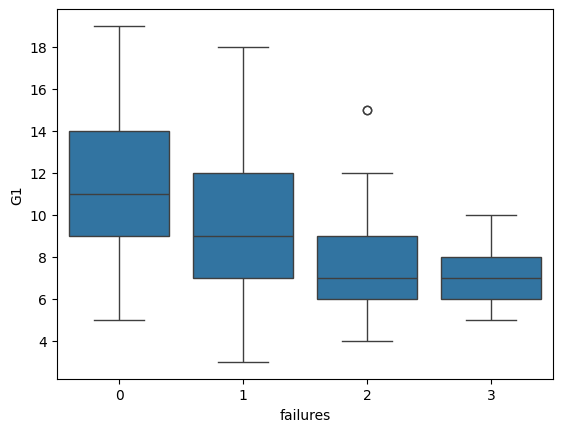

In [17]:
sns.boxplot(x="failures", y="G1", data=df)

<Axes: xlabel='schoolsup', ylabel='G1'>

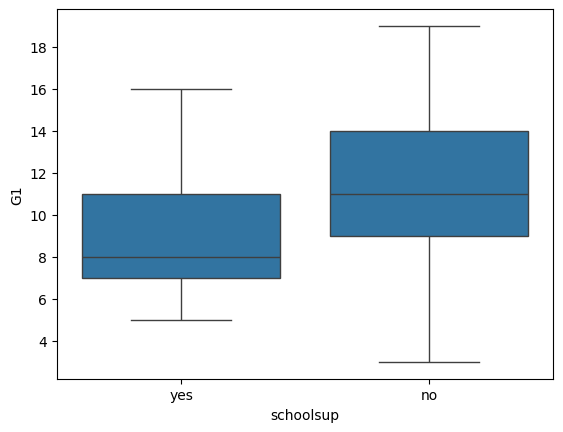

In [18]:
sns.boxplot(x="schoolsup", y="G1", data=df)
